# Checkpoint 1 - Data Science and Statistical Computing
Considere os notebooks dados nas últimas aulas, em especial, o que contém o estudo de caso de produtividades de mão de obra na construção civil.
Reveja as aulas dadas e as videoaulas recomendadas de lição de casa.
Junte um grupo de 4 a 5 integrantes e elabore um "relatório" abaixo, mesclando respostas e códigos para os questionamentos à seguir.
Entrega via Teams até um dia antes da próxima aula.
**Considere os dados do estudo de caso de construção civil**.

## **Tipos de Variáveis**
### 1 - Crie um código que importa os dados e, ao importá-los analise suas colunas comentando sobre o tipo de variável de cada uma.
### 2 - Estatística é sobre "responder perguntas com dados", se coloque no lugar do gestor da construtora: com esses dados de produtividade de equipes em 3 obras diferentes, que tipo de perguntas poderíamos responder com esses dados (liste as que conseguir pensar)?
(obs: sei que usar GPT hoje é "fácil" pra responder essa pergunta, mas darei um pontinho a mais pela originalidade e, principalmente, se você escrever com suas próprias palavras e realmente fizer sentido pra você).

## **Medidas de Posição Central, Gráfico de Densidade de Frequência e Boxplot**
### 3 - Utilize tudo que aprendeu sobre medidas de posição central, gráfico de densidade de frequência e boxplot para responder a seguinte pergunta: Há diferença de produtividade entre obras? Se há, qual obra mais produtiva? Qual menos produtiva? Consegue pensar em motivos para esses comportamentos?
(obs: cabe checar a caracterização das obras para pensar nos motivos...)

### 4 - Utilize tudo que aprendeu sobre medidas de posição central, gráfico de densidade de frequência e boxplot para responder a seguinte pergunta: Há diferença de produtividade entre blocos (coluna descrição)? Se há, qual bloco é mais produtivo? Qual menos produtivo? Consegue pensar em motivos para esses comportamentos?
(obs: aqui, nos motivos, ganha ponto a mais pela busca por referências que sustentem sua argumentação)

### 5 - Nas duas respostas anteriores, como estava a relação entre média e mediana? Estavam próximas, afastadas? Comente sobre a possibilidade de outliers no grupo de dados.
(obs: utilize o gráfico de boxplot para embasar sua argumentação).

### 6 - Qual dos blocos tem produtividade mais previsível? Qual tem produtividade menos previsível?

### 7 - Questão Extra (vale até 2 questões erradas acima, só para os fortes): Assista o vídeo https://www.youtube.com/watch?v=KRZzUFTmpwU (a partir do 16min36) e tome notas do que ficar com dúvida e exponha no seu notebook abaixo. Veja se consegue entender e explique com suas palavras como é feito o cálculo de um coeficiente sugerido à tabela de orçamentos da SIURB.

### 8 - Questão Extra parte 2 (vale meia questão errada): Comente o que está achando da disciplina, onde não ficou claro algum conceito, onde está mais interessante. Feedback sincero, construtivo. A ideia é sempre trazer o melhor e mais completo conteúdo pra vocês =)

# Grupo #
Ricardo Fernandes de Aquino (RM 554597)

Kaua Soares Guimarães (RM 559044)

Ana Clara Melo de Souza (RM 559021)

Gustavo Jun Irizawa Ikeda (RM 554718)

Yasmin Bezerra Sobral (RM 558757)

# Questão 1 #

In [2]:
import pandas as pd

df = pd.read_csv("dados_produtividade_construcao.csv")

df.head()

,Unnamed: 0,OBRA,CREATED,DESCRICAO,CLASSE_COMP,INSUMO_ATUAL,IP_D,UNIDADE,COEF_SIURB
0,1,Obra A,2021-02-03 11:17:30,BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM,ALVENARIA BLOCO APARENTE,MAO DE OBRA,0.342452,H/M2,1.9449
1,2,Obra A,2021-02-03 12:22:30,BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM,ALVENARIA BLOCO APARENTE,MAO DE OBRA,0.724638,H/M2,1.9449
2,3,Obra A,2021-02-04 11:44:00,BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM,ALVENARIA BLOCO APARENTE,MAO DE OBRA,1.123611,H/M2,1.9449
3,4,Obra A,2021-02-04 12:23:00,BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM,ALVENARIA BLOCO APARENTE,MAO DE OBRA,2.034783,H/M2,1.9449
4,5,Obra A,2021-02-04 12:40:00,BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM,ALVENARIA BLOCO APARENTE,MAO DE OBRA,1.037037,H/M2,1.9449


## É possivel inferir que os tipos dos dados são: ##

OBRA (Categórica Nominal): Identifica a obra onde o dado foi coletado.

CREATED (Data/Hora): Data e hora do registro.

DESCRICAO (Categórica Nominal): Detalha o tipo de bloco utilizado.

CLASSE_COMP (Categórica Nominal): Indica a classe do componente da construção.

INSUMO_ATUAL (Categórica Nominal): Especifica o tipo de insumo utilizado (ex: mão de obra).

IP_D (Numérica Contínua): Índice de produtividade (unidade de produção por tempo).

UNIDADE (Categórica Nominal): Unidade de medida.

COEF_SIURB (Numérica Contínua): Coeficiente de referência para orçamento de obras.

In [4]:
# Resumo estatístico
summary_df_obra = df.groupby(['OBRA'])['IP_D'].agg(['count', 'mean', 'median', 'min', 'max','std'])
print(f"\n Resumo Estatístico por OBRA (Índice de Produtividade Diário):")
print(summary_df_obra)

summary_df_servico = df.groupby(['DESCRICAO'])['IP_D'].agg(['count', 'mean', 'median', 'min', 'max','std'])
print(f"\n Resumo Estatístico por SERVIÇO (Índice de Produtividade Diário):")
print(summary_df_servico)


 Resumo Estatístico por OBRA (Índice de Produtividade Diário):
        count      mean    median       min       max       std
OBRA                                                           
Obra A    127  1.394745  1.123611  0.183007  5.747126  0.933688
Obra B    194  0.988062  0.778499  0.335946  5.191257  0.684858
Obra C    131  1.345409  1.128889  0.277143  4.516129  0.769722

 Resumo Estatístico por SERVIÇO (Índice de Produtividade Diário):
                                            count      mean    median  \
DESCRICAO                                                               
BLOCOS VAZADOS DE CONCRETO - 09CM             100  1.225015  0.810722   
BLOCOS VAZADOS DE CONCRETO - 14CM              99  1.026209  0.904762   
BLOCOS VAZADOS DE CONCRETO - 19CM             126  1.141559  0.924864   
BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM    127  1.394745  1.123611   

                                                 min       max       std  
DESCRICAO                          

# Questão 2 #

* Alguma obra precisa de mais suporte ou ajustes operacionais para melhorar seus índices?
* Quais insumos ou classes de componentes poderiam ser substituídos para melhorar a produtividade?
* Há padrões de eficiência que podem ser replicados de uma obra para outra?
* Como a escolha de determinados materiais impacta o custo e a produtividade?
* O coeficiente SIURB está alinhado com os índices de produtividade?
* Como a variação de produtividade está impactando os prazos da obra?
* O tipo de bloco influencia o desempenho entre obras?
* Quais insumos estão apresentando baixa produtividade em determinada obra?
* Como otimizar o uso de mão de obra para aumentar a produtividade sem elevar custos?
* Há desperdício ou baixa eficiência em algum insumo específico?
* Alguma obra tem um coeficiente SIURB significativamente maior ou menor? O que isso indica?
* Existe alguma variação sazonal na produtividade?
* Qual obra tem o maior índice de produtividade para cada tipo de insumo?
* A produtividade melhora ou piora ao longo do tempo?
* Há gargalos na produção que podem ser resolvidos com mudanças na alocação de insumos?
* Quais são as diferenças na produtividade entre as três obras?
* Quais descrições de blocos estão associadas aos maiores índices de produtividade?
* Existe uma relação entre a classe do componente e a produtividade?
* A mão de obra está sendo utilizada de forma otimizada, ou há necessidade de redistribuição?


# Questão 3

A análise dos dados confirma que há uma diferença significativa na produtividade entre as obras. A Obra B se destaca como a mais produtiva, com um Índice de Produtividade diário médio de 0.98, o que indica maior eficiência no uso dos recursos. Esse desempenho pode estar relacionado ao formato vertical da construção, que facilita a logística interna e reduz a necessidade de deslocamento de materiais e equipes. Além disso, a menor dispersão nos dados sugere que a produtividade foi mais estável ao longo do tempo.

Por outro lado, a Obra A apresentou a menor produtividade, com um Índice de Produtividade diário médio de 1.39, indicando maior consumo de recursos. A estrutura horizontal da construção pode ter exigido mais movimentação de materiais e equipes, reduzindo a eficiência. Além disso, a presença de picos nos índices de produtividade ou outliers sugere dificuldades para manter um fluxo de trabalho constante, o que pode ter resultado em períodos de baixa eficiência.

In [10]:
# prompt: Calcular a moda de manganes para cada estacao e, depois, fazer um gráfico para a estacao com maior moda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Função para calcular a moda contínua usando KDE
def calcular_moda_continua(Xi):
    Xi = Xi.dropna()  # Remove NaNs
    if len(Xi) == 0:
        return None
    # Calculando a moda contínua (usando KDE - Kernel Density Estimation)
    kernel = stats.gaussian_kde(Xi)
    x_range = np.linspace(Xi.min(), Xi.max(), 100)
    densidade = kernel(x_range)
    moda_continua = x_range[np.argmax(densidade)]
    return moda_continua

# Calcular a moda contínua para cada estação
moda_por_estacao_continua = df.groupby('OBRA')['IP_D'].apply(calcular_moda_continua)

# Exibir a moda contínua por estação
print(moda_por_estacao_continua)

OBRA
Obra A    0.913649
Obra B    0.728295
Obra C    0.962232
Name: IP_D, dtype: float64


In [8]:
summary_df_obra['Moda']=moda_por_estacao_continua
summary_df_obra

,count,mean,median,min,max,std,Moda
OBRA,,,,,,,
Obra A,127,1.394745,1.123611,0.183007,5.747126,0.933688,0.913649
Obra B,194,0.988062,0.778499,0.335946,5.191257,0.684858,0.728295
Obra C,131,1.345409,1.128889,0.277143,4.516129,0.769722,0.962232


# Questão 4

A análise dos dados revela que há diferença significativa na produtividade entre os blocos. Utilizando medidas de posição central e dispersão, observamos que o bloco de 14CM é o mais produtivo, pois apresenta o menor Índice de Produtividade diário médio, o que indica menor consumo de recursos para a mesma quantidade de alvenaria. Além disso, sua menor dispersão sugere que a produtividade ao utilizá-lo é mais constante e previsível.

Por outro lado, o bloco aparente de 19CM se mostrou o menos produtivo, apresentando um Índice de Produtividade diário médio mais alto e uma variabilidade maior. Esse comportamento pode estar relacionado ao fato de que blocos maiores e aparentes geralmente exigem maior precisão no assentamento e acabamento, o que pode aumentar o tempo de execução.

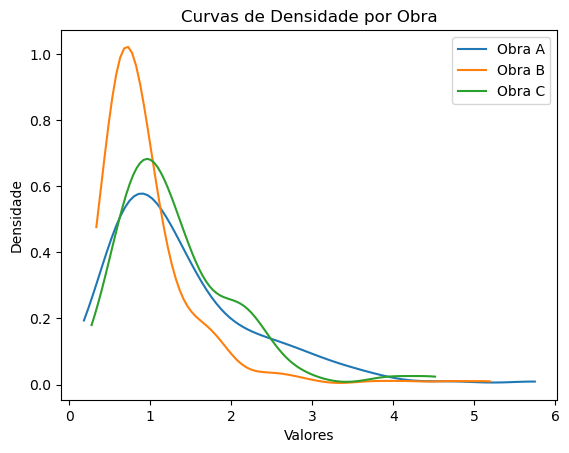

In [11]:
for obra in df['OBRA'].unique():
  Xi = df[df['OBRA'] == obra]['IP_D'].dropna()
  if len(Xi) > 0:
    kernel = stats.gaussian_kde(Xi)
    x_range = np.linspace(Xi.min(), Xi.max(), 100)
    densidade = kernel(x_range)
    plt.plot(x_range, densidade, label=obra)

plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.title('Curvas de Densidade por Obra')
plt.legend()
plt.show()

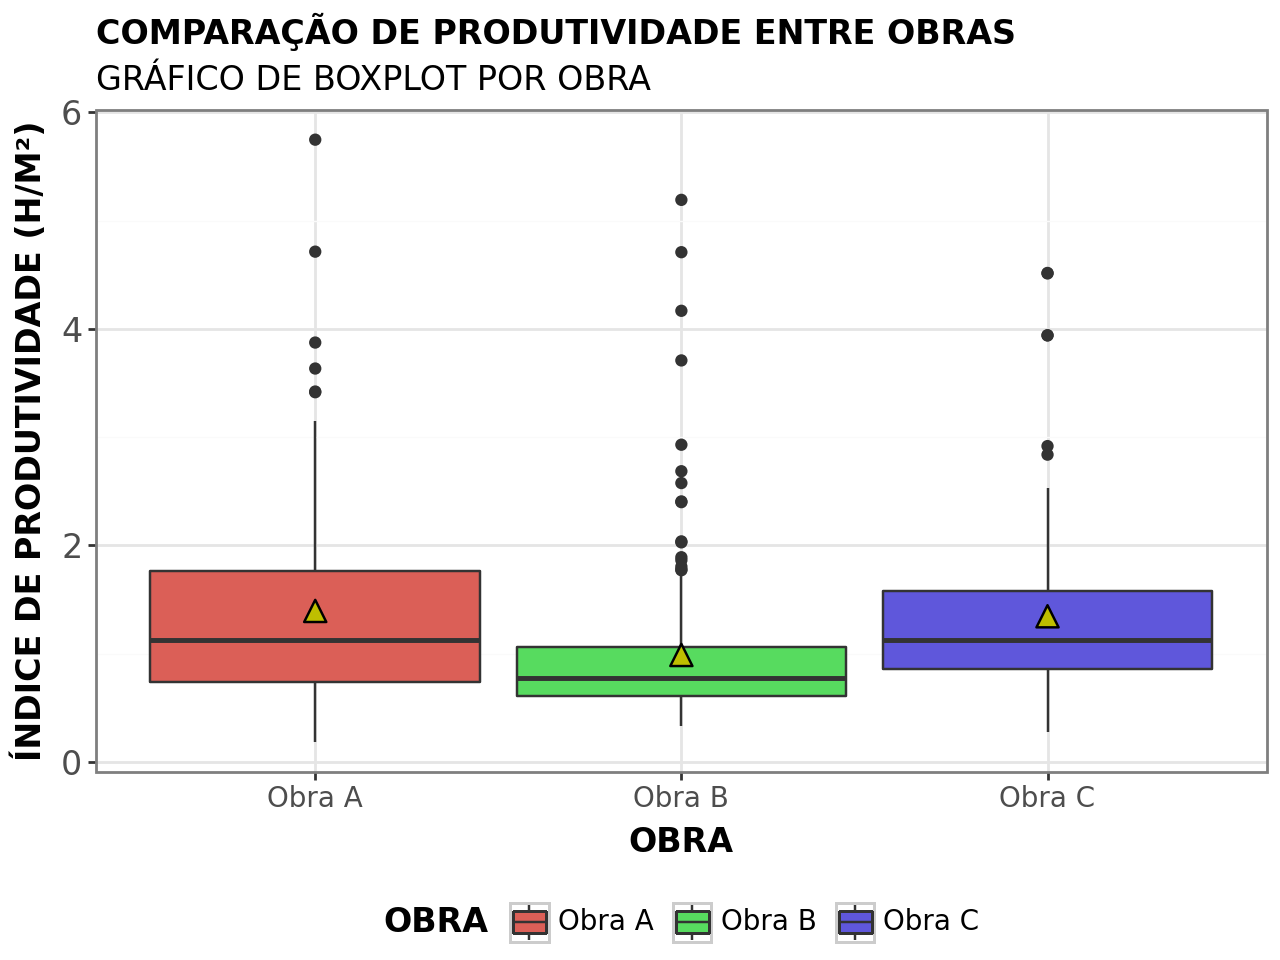

In [13]:
from plotnine import *
(ggplot(df, aes(x='OBRA', y='IP_D')) +
geom_boxplot(aes(fill='OBRA'), width = 0.9) +
#scale_y_log10() +
# scale_fill_manual(values={'Chuvoso': cor3, 'Estiagem': cor4}) +
# scale_fill_manual(values={'Antes': cor1, 'Depois': cor2}) +
# facet_wrap('~rompimento') +
stat_summary(aes(group='OBRA'), fun_y=np.mean, geom='point', size=4, shape='^', fill='y',
            position=position_dodge(width=1))+
labs(x='OBRA',y='ÍNDICE DE PRODUTIVIDADE (H/M²)',
    title = 'COMPARAÇÃO DE PRODUTIVIDADE ENTRE OBRAS',
    subtitle = 'GRÁFICO DE BOXPLOT POR OBRA',
    fill='OBRA') +
theme_bw() +
theme(legend_position='bottom',
        plot_title=element_text(size=12, face='bold'),
        plot_subtitle=element_text(size=12),
        axis_text_y=element_text(size=12),
        axis_text_x=element_text(size=10),
        axis_title=element_text(size=12, face='bold'),
        legend_title=element_text(size=12, face='bold'),
        legend_text=element_text(size=10),
        strip_text=element_text(size=12, face='bold')))

# Questão 5
Nas duas análises anteriores, tanto para obras quanto para blocos, a média foi maior que a mediana. Isso indica que as distribuições dos dados estão inclinadas para a direita, ou seja, há valores mais altos que são outliers que puxam a média para cima.

Os boxplots reforçam essa observação, mostrando pontos isolados acima da linha superior, o que sugere que, em alguns casos, o Índice de Produtividade foi bem mais alto que o normal. Essa diferença entre média e mediana é ainda mais evidente em alguns grupos, como no bloco de 09CM, onde a distância entre essas medidas estatísticas é maior, confirmando a presença de outliers.

Em resumo, essa diferença entre média e mediana, aliada à visualização dos boxplots, evidencia a existência de outliers nos dados.


# Questão 6
A análise das medidas de dispersão mostra que a previsibilidade da produtividade pode ser avaliada pela variação dos dados, observando o desvio padrão e a distribuição dos valores.

O bloco de 14CM é o mais previsível, pois tem menor variação relativa à sua média, o que indica uma produtividade mais constante e estável. Já o bloco de 09CM é o menos previsível, pois apresenta maior dispersão nos dados, sugerindo que a produtividade varia bastante dependendo do contexto da obra.

Essa interpretação é confirmada pelo boxplot, que mostra que o bloco de 14CM tem uma faixa interquartil mais estreita, indicando menor variação nos índices de produtividade. Já o bloco de 09CM apresenta uma dispersão maior, com mais outliers, reforçando que sua produtividade é menos consistente.


# Questão 7 #
## Como é Feito o Cálculo do Coeficiente Sugerido na Tabela de Orçamentos da SIURB ##

### Índice de Produtividade (IP) ###
O Índice de Produtividade (IP) nada mais é do que uma relação entre esforço e resultado:
        **IP = Recurso ou esforço / Produto ou resultado**
        
Ou seja, quanto menor o IP, melhor a produtividade, porque significa que foi possível fazer mais gastando menos.

**Como Medimos o IP?**

Existem três formas de acompanhamento:

* Diário → Calcula o IP de cada dia.
* Cumulativo → Soma os IPs ao longo do tempo.
* Cíclico → Considera ciclos de produção para acompanhar a variação.

**IP Acumulado**

O IP acumulado soma os valores ao longo do tempo e mantém a lógica do cálculo do IP original, só que agora considerando um período maior.

### Critério de Suficiência ###

Depois de certo ponto, adicionar mais dados não muda muito o resultado. Quando chegamos nesse ponto, sabemos que já temos apropriações suficientes para fazer uma boa análise.

**Como é Feito o Cálculo do Coeficiente Sugerido?**
Cada insumo tem sua produtividade distribuída de forma estatística, ou seja, existe uma curva mostrando a frequência de cada valor.

Eixo X → Índice de Produtividade (IP).

Eixo Y → Densidade (quanto maior a densidade, mais provável é obter esse resultado).

**IP Moda**

O IP moda é simplesmente o valor que aparece com mais frequência na distribuição. Ele representa o comportamento mais comum dentro da amostra.

## A Fórmula do Coeficiente Sugerido ##

O coeficiente sugerido é uma média ponderada das tabelas existentes junto com o IP moda:
* No exemplo apresentado no video por exemplo: (1 * sicro + 1 * sinapi + 2 * SIURB + 3 * IPmoda)/7

Os pesos podem mudar dependendo do contexto. No vídeo, a tabela SIURB teve um peso maior porque era a principal no momento.

**Percentis e Ajustes**

Os percentis ajudam a entender a distribuição dos coeficientes e permitem ajustes:

* Se quisermos que 75% das obras tenham coeficientes dentro de um determinado limite, ajustamos o coeficiente sugerido para abranger esse percentil.

### Resumindo ###

O cálculo do coeficiente sugerido envolve coletar dados, modelar estatisticamente e analisar a distribuição dos índices de produtividade. No final, o coeficiente é ajustado conforme necessário para garantir que ele faça sentido dentro do contexto da obra.


# Questão 8 #
Minha Opinião Sobre a Aula

Achei o tema da aula bem interessante, principalmente porque mexe com análise estatística e produtividade, que são coisas úteis na prática. Mas, em alguns momentos, acho que fica muito técnico e denso. Eu consigo entender os termos, mas tem hora que a explicação vai tão a fundo que acabo dando uma moscada. Seria legal se tivesse mais código no meio, algo mais aplicado para ilustrar melhor os conceitos. Acho que ajudaria a manter a atenção e a ver como isso se conecta com programação na prática.

